<a href="https://colab.research.google.com/github/joezerr/Project/blob/main/SIFT_%7C_assignment_5_%7C_2440057672.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Learning experience:*
BFFMatcher(Brute force matcher) will try all of the possibilities and find the best matches, while Flann (Fast library for approximate nearest neighbours will find a good matching but not necessarily the best one. We can adjust the parameter of FLann to increase the precision, though it will slow the algorithm

Flann is much faster than BFMatcher but it only finds an approximate nearest neighbour (good matching) but not the best, while BFMatcher will output the best matches.

reference: 
- https://stackoverflow.com/questions/54208099/opencvs-flann-matcher-index-in-python 
- https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/
- https://assets.pikiran-rakyat.com/crop/0x0:0x0/x/photo/2021/02/09/2564290970.jpg
- https://people.cs.nctu.edu.tw/~whtsai/India_2007/Webpages/07%20Summary%20Pictures/originalimages/Day%205%20---%2001-03%20Taj%20Mahal%20(a%20side%20view)%20(taken%20by%20Meimei).jpg
- https://docs.opencv.org/3.4/dc/de2/classcv_1_1FlannBasedMatcher.html 

IMPORT LIBRARIES

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from google.colab.patches import cv2_imshow #used to show image since cv2.imshow isnt applicable in google colab
from skimage import io #used to import image from the internet

In [ ]:
# read images
source1 = 'https://assets.pikiran-rakyat.com/crop/0x0:0x0/x/photo/2021/02/09/2564290970.jpg' #ill be using Taj Mahal images.
image1 = io.imread(source1) 

source2 = 'https://people.cs.nctu.edu.tw/~whtsai/India_2007/Webpages/07%20Summary%20Pictures/originalimages/Day%205%20---%2001-03%20Taj%20Mahal%20(a%20side%20view)%20(taken%20by%20Meimei).jpg' 
image2 = io.imread(source2) 

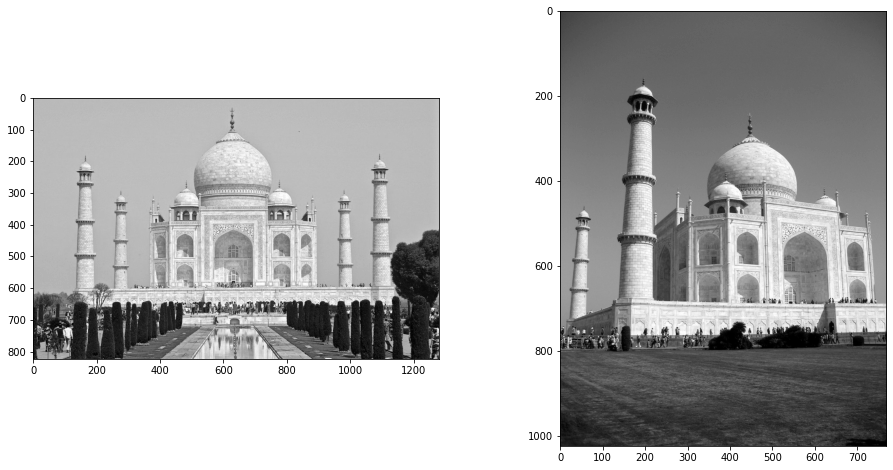

In [ ]:
#make it grayscale using cv2.cvtColor
img1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

#plot
figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

In [ ]:
#sift 
#used to extracting keypoints and computing descriptors
sift = cv2.xfeatures2d.SIFT_create()

#detectAndCompute is used to detect keypoints and compute the descriptors, it will return two values
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None) 
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

len(keypoints_1), len(keypoints_2)

(5116, 2659)

**FEATURE MATCHING USING BFFMatcher**

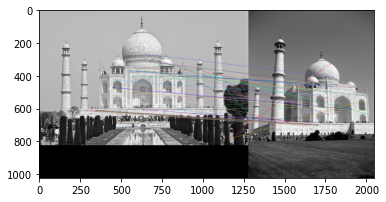

(<matplotlib.image.AxesImage at 0x7fb3b64c5950>, None)

In [ ]:
#feature matching

#use match funtion from BFFMatcher to match features from image 1 with image 2
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

#draw line between matching features from both images using drawMatches function
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()

**FEATURE MATCHING USING Flann**

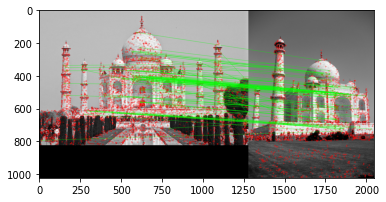

(<matplotlib.image.AxesImage at 0x7fb3b6365ed0>, None)

In [ ]:
# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

#FlannBasedMatcher trains flann index on a train descriptor and calls its nearest search methods to find the best matches
flann = cv2.FlannBasedMatcher(index_params,search_params)

#convert to float32
des1 = np.float32(descriptors_1)
des2 = np.float32(descriptors_2)

#knnmatch returns k = 2 best best matches 
matches = flann.knnMatch(des1,des2,k=2)

#draw only good matches, create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

#draw line between matching features from both images using drawMatchesKnn
img3 = cv2.drawMatchesKnn(img1,keypoints_1,img2,keypoints_2,matches,None,**draw_params)

#plot the result
plt.imshow(img3,),plt.show()

*Overall, BFMatches will try all different possiblities to find the best matches while Flann will find an approximate nearest neighbour (a good matches not the best one). Flann performs much faster than BFMatcher but not necessarily the best.*